In [1]:
import os
os.chdir('/Users/zhanwenxin/Documents/GitHub/cuTAGI')

import scipy.io as sio
from src.RL_functions.generate_one_synthetic_time_series import generate_datetime_values
from datetime import datetime

In [2]:
# Load the real time series
time_series_path = './data/HQ/CASC_LGA007EFAPRG910_2024_07.mat'
real_data = sio.loadmat(time_series_path)
real_timestamps = real_data['values'][:, 1][0].T[0][540:]
real_obs = real_data['values'][:, 2][0].T[0][540:].tolist()
real_datetime = generate_datetime_values(start_datetime=datetime(2012, 1, 15, 12, 0, 0), num_values=len(real_obs), time_step_interval=7)

# Save real obs and real datetime to two csv file, the first row is the column name
import csv
with open('./data/HQ/real_obs.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['real_obs'])
    for obs in real_obs:
        writer.writerow([obs])
with open('./data/HQ/real_datetime.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['datetime'])
    for datetime in real_datetime:
        writer.writerow([datetime])

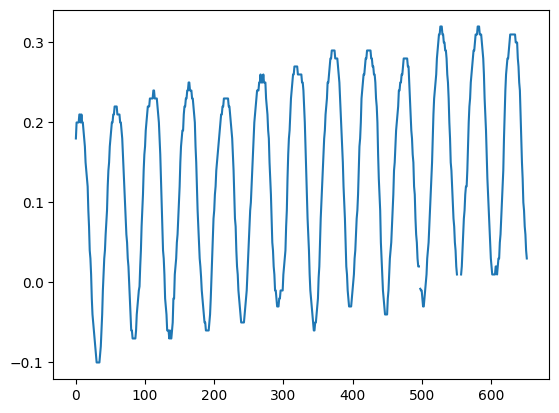

In [3]:
# Load the saved real time series
import pandas as pd

real_obs = pd.read_csv('./data/HQ/real_obs.csv')['real_obs'].tolist()
real_datetime = pd.read_csv('./data/HQ/real_datetime.csv')['datetime'].tolist()

#plot the real time series
import matplotlib.pyplot as plt
plt.plot(real_obs)